In [346]:
import numpy as np
import time
import pandas as pd

In [347]:
rf_path = "./rt-ifttt/rt-ifttt.csv"
rf_data = pd.read_csv(rf_path)

In [348]:
rf_data

,Unnamed: 0,OutdoorUV,OutdoorVisibleRay_Lux,OutdoorTemperature_C,OutdoorHumidity_pct,OutdoorPressure_hPa,IndoorUV,IndoorVisibleRay_Lux,IndoorTemperature_C,IndoorHumidity_pct,IndoorPressure_hPa
0,0,4.21,51624.113281,30.68,27.867188,1012.76,0.07,925.531921,27.26,33.154297,1011.81
1,1,4.20,51675.531250,30.63,27.899414,1012.79,0.07,771.276611,27.26,33.232422,1011.79
2,2,4.24,52035.460938,30.76,27.815430,1012.74,0.05,668.439697,27.29,33.145508,1011.78
3,3,4.23,51984.042969,30.75,27.781250,1012.74,0.05,617.021301,27.30,33.145508,1011.78
4,4,4.24,51881.207031,30.87,27.731445,1012.70,0.05,617.021301,27.29,33.123047,1011.72
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.73,9101.063477,20.71,40.255859,1013.13,0.06,565.602844,27.24,30.381836,1012.20
9996,9996,0.74,9101.063477,20.72,40.235352,1013.11,0.04,617.021301,27.24,30.392578,1012.15
9997,9997,0.74,9049.645508,20.73,40.368164,1013.15,0.03,565.602844,27.24,30.381836,1012.18
9998,9998,0.74,9101.063477,20.73,40.423828,1013.08,0.05,565.602844,27.24,30.415039,1012.18


In [349]:
print("检查每一列是否存在空值：")
print(rf_data.isna().any())

检查每一列是否存在空值：
Unnamed: 0               False
OutdoorUV                False
OutdoorVisibleRay_Lux    False
OutdoorTemperature_C     False
OutdoorHumidity_pct      False
OutdoorPressure_hPa      False
IndoorUV                 False
IndoorVisibleRay_Lux     False
IndoorTemperature_C      False
IndoorHumidity_pct       False
IndoorPressure_hPa       False
dtype: bool


In [350]:
weather_humidity_path = "./Historical Hourly Weather Data 2012-2017/humidity.csv"
weather_pressure_path = "./Historical Hourly Weather Data 2012-2017/pressure.csv"
weather_temperature_path = "./Historical Hourly Weather Data 2012-2017/temperature.csv"
weather_wind_speed_path = "./Historical Hourly Weather Data 2012-2017/wind_speed.csv"
weather_humidity_data = pd.read_csv(weather_humidity_path)
weather_pressure_data = pd.read_csv(weather_pressure_path)
weather_temperature_data = pd.read_csv(weather_temperature_path)
weather_wind_speed_data = pd.read_csv(weather_wind_speed_path)
weather_data = [weather_humidity_data, weather_pressure_data, weather_temperature_data, weather_wind_speed_data]

In [351]:
for idx, dataset in enumerate(weather_data):
    print("检查第 " + str(idx) + " 个数据集的每一列是否存在空值：")
    print(dataset.isna().any())

检查第 0 个数据集的每一列是否存在空值：
datetime             False
Vancouver             True
Portland              True
San Francisco         True
Seattle               True
Los Angeles           True
San Diego             True
Las Vegas             True
Phoenix               True
Albuquerque           True
Denver                True
San Antonio           True
Dallas                True
Houston               True
Kansas City           True
Minneapolis           True
Saint Louis           True
Chicago               True
Nashville             True
Indianapolis          True
Atlanta               True
Detroit               True
Jacksonville          True
Charlotte             True
Miami                 True
Pittsburgh            True
Toronto               True
Philadelphia          True
New York              True
Montreal              True
Boston                True
Beersheba             True
Tel Aviv District     True
Eilat                 True
Haifa                 True
Nahariyya             True
Jerusa

In [352]:
for dataset in weather_data:
    for col_name in dataset.columns:
        # 处理空值
        if dataset[col_name].isnull().any():
            # 用平均值填充
            dataset.fillna({col_name: int(dataset[col_name].mean())}, inplace=True)

In [353]:
for idx, dataset in enumerate(weather_data):
    print("检查第 " + str(idx) + " 个数据集的每一列是否存在空值：")
    print(dataset.isna().any())

检查第 0 个数据集的每一列是否存在空值：
datetime             False
Vancouver            False
Portland             False
San Francisco        False
Seattle              False
Los Angeles          False
San Diego            False
Las Vegas            False
Phoenix              False
Albuquerque          False
Denver               False
San Antonio          False
Dallas               False
Houston              False
Kansas City          False
Minneapolis          False
Saint Louis          False
Chicago              False
Nashville            False
Indianapolis         False
Atlanta              False
Detroit              False
Jacksonville         False
Charlotte            False
Miami                False
Pittsburgh           False
Toronto              False
Philadelphia         False
New York             False
Montreal             False
Boston               False
Beersheba            False
Tel Aviv District    False
Eilat                False
Haifa                False
Nahariyya            False
Jerusa

In [354]:
bridge_21416_DPM_path = "./2021-04-16/2021-04-16 00-DPM.csv"
bridge_21416_HPT_path = "./2021-04-16/2021-04-16 00-HPT.csv"
bridge_21416_RHS_path = "./2021-04-16/2021-04-16 00-RHS.csv"
bridge_21416_ULT_path = "./2021-04-16/2021-04-16 00-ULT.csv"
bridge_21416_VIB_path = "./2021-04-16/2021-04-16 00-VIB.csv"
bridge_21416_VIC_path = "./2021-04-16/2021-04-16 00-VIC.csv"
bridge_21416_DPM_data = pd.read_csv(bridge_21416_DPM_path)
bridge_21416_HPT_data = pd.read_csv(bridge_21416_HPT_path)
bridge_21416_RHS_data = pd.read_csv(bridge_21416_RHS_path)
bridge_21416_ULT_data = pd.read_csv(bridge_21416_ULT_path)
bridge_21416_VIB_data = pd.read_csv(bridge_21416_VIB_path)
bridge_21416_VIC_data = pd.read_csv(bridge_21416_VIC_path)

bridge_data = [bridge_21416_DPM_data, bridge_21416_HPT_data, bridge_21416_RHS_data, bridge_21416_ULT_data, bridge_21416_VIB_data,bridge_21416_VIC_data]

In [355]:
for idx, dataset in enumerate(bridge_data):
    print("检查第 " + str(idx) + " 个数据集的每一列是否存在空值：")
    print(dataset.isna().any())

检查第 0 个数据集的每一列是否存在空值：
00:00:00.000    False
 103.761        False
 101.761        False
Unnamed: 3       True
dtype: bool
检查第 1 个数据集的每一列是否存在空值：
00:00:00.000    False
4854.628        False
4799.306        False
3366.273        False
3323.542        False
2026.681        False
1960.522        False
1204.850        False
1158.819        False
1637.626        False
1566.018        False
 960.728        False
 929.909        False
Unnamed: 13      True
dtype: bool
检查第 2 个数据集的每一列是否存在空值：
00:00:00.000    False
  24.478        False
  48.877        False
  24.611        False
  55.545        False
  24.291        False
  42.173        False
  24.401        False
  43.895        False
  24.864        False
  78.694        False
  24.850        False
  78.495        False
Unnamed: 13      True
dtype: bool
检查第 3 个数据集的每一列是否存在空值：
00:00:00.000    False
   5.629        False
 370.062        False
Unnamed: 3       True
dtype: bool
检查第 4 个数据集的每一列是否存在空值：
00:00:00.000    False
  -0.387        False
   0.4

In [356]:
for idx in range(len(weather_data)):
    weather_data[idx] = weather_data[idx].drop(weather_data[idx].columns[0], axis=1)

In [357]:
weather_data[0]

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,81.0,74.0,76.0,77.0,62.0,67.0,31.0,37.0,45.0,53.0,...,68.0,66.0,71.0,77.0,70.0,66.0,25.0,79.0,78.0,68.0
1,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,81.0,81.0,76.0,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,66.0,64.0,37.0,70.0,66.0,53.0,79.0,78.0,68.0
45249,81.0,71.0,76.0,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,66.0,59.0,74.0,70.0,66.0,53.0,79.0,78.0,68.0
45250,81.0,71.0,76.0,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,66.0,66.0,74.0,70.0,66.0,53.0,79.0,78.0,68.0
45251,81.0,71.0,76.0,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,66.0,58.0,56.0,70.0,66.0,53.0,79.0,78.0,68.0


In [358]:
weather_data_list = ["_humidity", "_pressure", "_temperature", "_wind_speed"]
for idx_dataset in range(len(weather_data)):   
    for idx in range(len(weather_data[idx_dataset].columns)):
        weather_data[idx_dataset].columns.values[idx] += weather_data_list[idx_dataset]

In [359]:
data_aggregated = pd.concat([rf_data], axis=1)
data_aggregated.columns.values[0] = "Timestamp"

In [360]:
data_aggregated

,Timestamp,OutdoorUV,OutdoorVisibleRay_Lux,OutdoorTemperature_C,OutdoorHumidity_pct,OutdoorPressure_hPa,IndoorUV,IndoorVisibleRay_Lux,IndoorTemperature_C,IndoorHumidity_pct,IndoorPressure_hPa
0,0,4.21,51624.113281,30.68,27.867188,1012.76,0.07,925.531921,27.26,33.154297,1011.81
1,1,4.20,51675.531250,30.63,27.899414,1012.79,0.07,771.276611,27.26,33.232422,1011.79
2,2,4.24,52035.460938,30.76,27.815430,1012.74,0.05,668.439697,27.29,33.145508,1011.78
3,3,4.23,51984.042969,30.75,27.781250,1012.74,0.05,617.021301,27.30,33.145508,1011.78
4,4,4.24,51881.207031,30.87,27.731445,1012.70,0.05,617.021301,27.29,33.123047,1011.72
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.73,9101.063477,20.71,40.255859,1013.13,0.06,565.602844,27.24,30.381836,1012.20
9996,9996,0.74,9101.063477,20.72,40.235352,1013.11,0.04,617.021301,27.24,30.392578,1012.15
9997,9997,0.74,9049.645508,20.73,40.368164,1013.15,0.03,565.602844,27.24,30.381836,1012.18
9998,9998,0.74,9101.063477,20.73,40.423828,1013.08,0.05,565.602844,27.24,30.415039,1012.18


In [361]:
for idx in range(len(weather_data)):
    data_aggregated = pd.concat([data_aggregated, weather_data[idx].head(10000)], axis=1)

In [362]:
data_aggregated

,Timestamp,OutdoorUV,OutdoorVisibleRay_Lux,OutdoorTemperature_C,OutdoorHumidity_pct,OutdoorPressure_hPa,IndoorUV,IndoorVisibleRay_Lux,IndoorTemperature_C,IndoorHumidity_pct,...,Philadelphia_wind_speed,New York_wind_speed,Montreal_wind_speed,Boston_wind_speed,Beersheba_wind_speed,Tel Aviv District_wind_speed,Eilat_wind_speed,Haifa_wind_speed,Nahariyya_wind_speed,Jerusalem_wind_speed
0,0,4.21,51624.113281,30.68,27.867188,1012.76,0.07,925.531921,27.26,33.154297,...,2.0,3.0,3.0,3.0,1.0,2.0,8.0,3.0,3.0,1.0
1,1,4.20,51675.531250,30.63,27.899414,1012.79,0.07,771.276611,27.26,33.232422,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2,4.24,52035.460938,30.76,27.815430,1012.74,0.05,668.439697,27.29,33.145508,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,3,4.23,51984.042969,30.75,27.781250,1012.74,0.05,617.021301,27.30,33.145508,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,4,4.24,51881.207031,30.87,27.731445,1012.70,0.05,617.021301,27.29,33.123047,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.73,9101.063477,20.71,40.255859,1013.13,0.06,565.602844,27.24,30.381836,...,3.0,3.0,2.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0
9996,9996,0.74,9101.063477,20.72,40.235352,1013.11,0.04,617.021301,27.24,30.392578,...,3.0,3.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0
9997,9997,0.74,9049.645508,20.73,40.368164,1013.15,0.03,565.602844,27.24,30.381836,...,3.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0
9998,9998,0.74,9101.063477,20.73,40.423828,1013.08,0.05,565.602844,27.24,30.415039,...,3.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0


In [363]:
data_aggregated.shape[0]

10000

# Batch
- Experiment Settings:
    - 上链时间：20s
    - Device数量：20个
- Basic Method
    - 数据集所有设备按照10s为上链时间，构建 basic unit，每个 unit 包含10个data point
    - 每10s内共有 10 * device_number 个数据点，全部存储list中并shuffle再以10为单位重组为 device_number 个 unit
    - 将这10s内的所有 unit 放入 list 并 shuffle ，再以 10 个 unit 为单位重组为 多个 Batch
- Proposed Method
    - 数据集所有设备按照10s为上链时间，构建 basic unit，每个 unit 包含某个特定设备的10个data point （保证 unit 中的数据全部属于同个device）
    - 构建Batch
        - 首先根据Device数量构建一张Graph，节点数为Device number
            - 对权重进行初始化（初始化算法：根据0-10s这批数据生成的Query进行初始化，若使用Device编码初始化非常不合理，对后续数据影响大）
            - 生成这10s内数据的Query 
                - 生成方式：按照高斯分布生成，第一批数据的query用于更新构建第二批数据Batch时的Device图
                - 生成数量：200个数据，20个query
                - 每10s内的数据生成的Query应该服从同样的分布（这个必须保证且非常重要！！！ 生成时要符合高斯分布）

# Basic Method

In [364]:
import random
import copy
time_on_chain = 20
unit_num = 5
batch_num = 5
batched_basic_method = {} # 以字典存储所有的Batch batch_id : []
cnt = 0
time_max = 1999
for start_time in range(0, time_max, time_on_chain):
    end_time = start_time + time_on_chain
    data_points = []
    for time in range(start_time, end_time):
        for device in range(1, 21):
            # data_points.append(data_aggregated.loc[time][device])
            data_points.append((time, device))                # 400 个数据点
    random.shuffle(data_points) # 随机打乱
    
    # 按照 unit_num 个 data_point 为一组打包
    units_list = []
    unit_tmp = []
    # print(len(data_points))
    for idx in range(0, len(data_points), unit_num):          # 以 5 为步长
        for i in range(idx, idx + unit_num):
            unit_tmp.append(data_points[i])
        units_list.append(copy.deepcopy(unit_tmp))            # 得到 400 / 5 = 80 个 unit
        unit_tmp.clear()
    # print(len(units_list))
    random.shuffle(units_list)

    # 按照 batch_num 个 unit 为一组打包
    batch_list = []
    batch_tmp = []
    for idx in range(0, len(units_list), batch_num):          # 得到 80 / 5 = 16 个 batch
        for i in range(idx, idx + batch_num):
            batch_tmp.append(units_list[i])
        batch_list.append(copy.deepcopy(batch_tmp))
        batch_tmp.clear()
    for batch in batch_list:
        batched_basic_method[str(cnt)] = batch
        cnt += 1

In [365]:
len(batched_basic_method.items())

1600

In [366]:
batched_basic_method

{'0': [[(19, 13), (19, 14), (12, 2), (19, 5), (18, 18)],
  [(15, 8), (2, 4), (2, 15), (12, 5), (1, 19)],
  [(2, 7), (6, 12), (13, 5), (9, 10), (10, 16)],
  [(17, 6), (15, 18), (0, 1), (13, 12), (10, 8)],
  [(7, 12), (10, 5), (15, 10), (18, 16), (17, 19)]],
 '1': [[(5, 19), (10, 20), (16, 7), (15, 15), (14, 18)],
  [(7, 8), (9, 6), (13, 13), (0, 13), (16, 12)],
  [(11, 16), (16, 10), (4, 11), (2, 6), (2, 20)],
  [(1, 4), (10, 14), (5, 6), (3, 16), (14, 3)],
  [(3, 19), (5, 20), (16, 3), (6, 11), (16, 19)]],
 '2': [[(6, 18), (13, 20), (7, 2), (15, 11), (10, 13)],
  [(17, 2), (3, 1), (1, 18), (16, 18), (13, 9)],
  [(12, 7), (11, 10), (9, 5), (1, 20), (18, 1)],
  [(14, 20), (7, 4), (0, 18), (13, 3), (6, 3)],
  [(10, 15), (12, 19), (10, 12), (3, 13), (18, 10)]],
 '3': [[(6, 4), (16, 6), (11, 12), (5, 5), (1, 6)],
  [(1, 8), (8, 5), (6, 10), (9, 1), (14, 7)],
  [(10, 3), (8, 20), (19, 10), (15, 17), (18, 4)],
  [(3, 2), (8, 3), (4, 19), (19, 7), (3, 15)],
  [(4, 1), (2, 8), (12, 3), (17, 18)

# Proposed Method

In [367]:
# 建图
import networkx as nx
# 创建一个空的无向图
G = nx.Graph()
device_value_max = 20
G.add_nodes_from(range(device_value_max))

In [368]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 20
Number of edges: 0


In [369]:
import matplotlib.pyplot as plt
import scipy
'''plt.figure(figsize=(10, 6))
nx.draw(G, node_size=5)
plt.title("Visualization of the Graph with Nodes")
plt.show()'''

'plt.figure(figsize=(10, 6))\nnx.draw(G, node_size=5)\nplt.title("Visualization of the Graph with Nodes")\nplt.show()'

In [370]:
vDevice = 1
count = 0
for node in G.nodes():
    # 为每个节点添加两个属性值
    nx.set_node_attributes(G, {node: {'device_id': vDevice}})
    count += 1
    if vDevice <= device_value_max:
            vDevice += 1

In [371]:
import numpy as np
from scipy.stats import truncnorm

# 定义截断正态分布
def truncated_normal(mean, std_dev, low, high):
    a = (low - mean) / std_dev
    b = (high - mean) / std_dev
    return truncnorm(a, b, loc=mean, scale=std_dev)

def generateQuery(num_queries, time_low, time_high, device_value_max):
    # 采用 10000个时间点导致建图开销过于庞大，先用1000个时间点，20个设备
    # 构建一个拥有1000 * 20 = 20000 个节点的无向图，生成100个query对权重进行迭代
    device_low, device_high = 1, device_value_max
    query_time_length_mu = ((1 + time_on_chain) / 2) # 尽可能让 time_length 较长，
    query_time_length_sigma = int((time_on_chain - 1) / 6)

    queries = []
    def is_overlap_points_less_enough(time_lower_bound, time_upper_bound, device_lower_bound, device_upper_bound, queries, min_points):
        for (q_t_l, q_t_u), (q_d_l, q_d_u) in queries:
            if time_lower_bound >= q_t_u or time_upper_bound <= q_t_l or device_upper_bound <= q_d_l or device_lower_bound >= q_d_u:
                continue
            else:
                time_delta = min(abs(time_upper_bound - q_t_l), abs(time_upper_bound - time_lower_bound), abs(time_lower_bound - q_t_u), abs(q_t_l - q_t_u))
                device_delta = min(abs(device_upper_bound - q_d_l), abs(device_upper_bound - q_d_u), abs(device_upper_bound - device_lower_bound), abs(q_d_l - q_d_u))
                if (time_delta + 1) * (device_delta + 1) > min_points:
                    return False
        return True
    
    for _ in range(num_queries):
        bounds = []
        while(True):
            tried = 0
            mean = (time_low + time_high) / 2
            std_dev = (time_high - time_low) / 6  # 经验法则：99.7%的数据在3个标准差内
            # 生成time_center
            time_center = round(truncated_normal(mean, std_dev, time_low, time_high).rvs())
            # print(f"time_center: {time_center}")
            time_length = abs(np.random.normal(query_time_length_mu, query_time_length_sigma))
            # print(f"time_length: {time_length}")
            time_lower_bound = round(max(time_low, time_center - time_length / 2))
            time_upper_bound = round(min(time_high, time_center + time_length / 2))
            
            mean = (device_low + device_high) / 2
            std_dev = (device_high - device_low) / 6  # 经验法则：99.7%的数据在3个标准差内
            # 生成time_center
            device_center = round(truncated_normal(mean, std_dev, device_low, device_high).rvs())
            # device_length = abs(np.random.normal(query_device_length_mu, query_device_length_sigma))
            device_length = round( unit_num * batch_num / time_length )
            device_lower_bound = round(max(device_low, device_center - device_length / 2))
            device_upper_bound = round(min(device_high, device_center + device_length / 2))
            
            area = (time_upper_bound - time_lower_bound + 1) * (device_upper_bound - device_lower_bound + 1)
            tried += 1
            # 一批数据的总数据点个数为400个, 共16个batch，得到每个batch中有25个数据点
            # 如果生成query做到对数据点全覆盖，会导致2种batch方式最终都要访问所有的batch，时间开销上差距不大，故生成16 / 2 = 8个数据点比较合适
            # 但是query也不能太少，因为query太少会导致很多节点没有出现在对图的权重进行迭代的过程中
            if 1 <= area <= 40 and time_length >= 5 and is_overlap_points_less_enough(time_lower_bound, time_upper_bound, device_lower_bound, device_upper_bound, queries, 10):
                bounds = [(time_lower_bound, time_upper_bound), (device_lower_bound, device_upper_bound)]
                break
            if tried == 20:
                print(f"try {tried} times.")
        queries.append(bounds)
    return queries

# Device图初始化操作

In [372]:
import math
def init_edge_weights(G):
    count = 0
    zero_count = 0
    # 必须加上data=True才可以迭代
    for u, u_attrs in G.nodes(data=True):
        for v, v_attrs in G.nodes(data=True):
            if u != v:
                weight = 1 / (math.sqrt((u_attrs['device_id'] - v_attrs['device_id']) ** 2))
                # 添加边到图中，并附带权重信息
                G.add_edge(u, v, weight=weight)
                count += 1
    print(count)
    print(zero_count)
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())

In [373]:
init_edge_weights(G)

380
0
Number of nodes: 20
Number of edges: 190


In [374]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 20
Number of edges: 190


In [375]:
for u, v, attrs in G.edges(data=True):
    print("Edge:", u, "-", v, ", Weight:", attrs['weight'])

Edge: 0 - 1 , Weight: 1.0
Edge: 0 - 2 , Weight: 0.5
Edge: 0 - 3 , Weight: 0.3333333333333333
Edge: 0 - 4 , Weight: 0.25
Edge: 0 - 5 , Weight: 0.2
Edge: 0 - 6 , Weight: 0.16666666666666666
Edge: 0 - 7 , Weight: 0.14285714285714285
Edge: 0 - 8 , Weight: 0.125
Edge: 0 - 9 , Weight: 0.1111111111111111
Edge: 0 - 10 , Weight: 0.1
Edge: 0 - 11 , Weight: 0.09090909090909091
Edge: 0 - 12 , Weight: 0.08333333333333333
Edge: 0 - 13 , Weight: 0.07692307692307693
Edge: 0 - 14 , Weight: 0.07142857142857142
Edge: 0 - 15 , Weight: 0.06666666666666667
Edge: 0 - 16 , Weight: 0.0625
Edge: 0 - 17 , Weight: 0.058823529411764705
Edge: 0 - 18 , Weight: 0.05555555555555555
Edge: 0 - 19 , Weight: 0.05263157894736842
Edge: 1 - 2 , Weight: 1.0
Edge: 1 - 3 , Weight: 0.5
Edge: 1 - 4 , Weight: 0.3333333333333333
Edge: 1 - 5 , Weight: 0.25
Edge: 1 - 6 , Weight: 0.2
Edge: 1 - 7 , Weight: 0.16666666666666666
Edge: 1 - 8 , Weight: 0.14285714285714285
Edge: 1 - 9 , Weight: 0.125
Edge: 1 - 10 , Weight: 0.1111111111111111

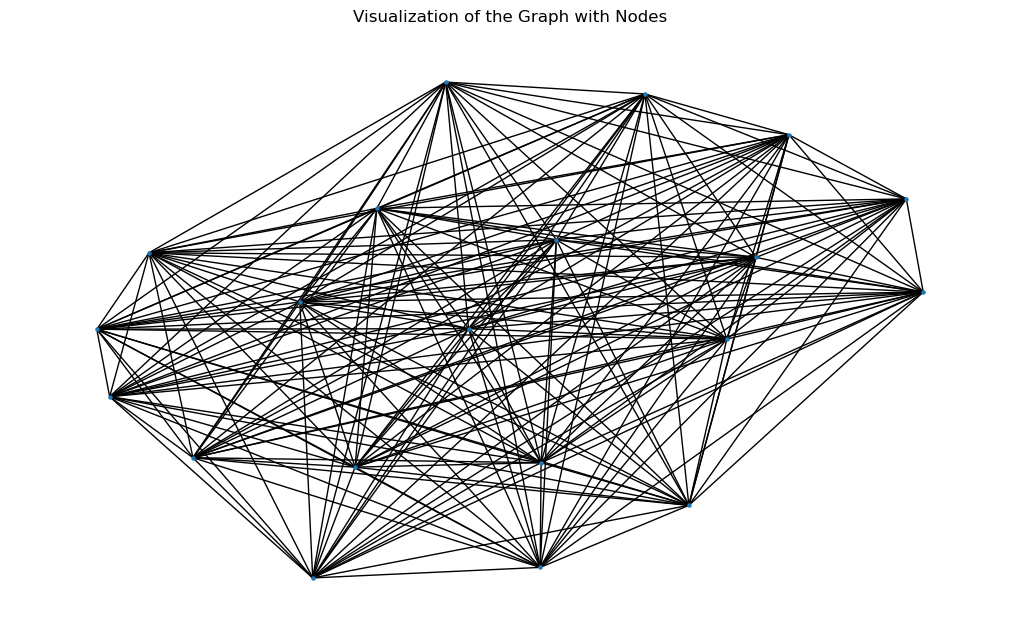

In [376]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
nx.draw(G, node_size=5)
plt.title("Visualization of the Graph with Nodes")
plt.show()

# 每10s进行一次迭代，循环迭代得到最终结果
## 注意点：此处需要额外设置新的weight更新策略

In [377]:
from sklearn.cluster import KMeans
from collections import Counter
batched_proposed_method = {} # 以字典存储所有的Batch batch_id : []
cnt = 0
time_on_chain = 20
unit_num = 5
batch_num = 5

In [378]:
# 采样记录所有的Query
Query_sets = []
for start_time in range(0, time_max, time_on_chain):
    end_time = start_time + time_on_chain
    units_list = []
    unit_tmp = []
    device_id = 1
    while device_id <= device_value_max:
        time_cnt = 0
        for time in range(start_time, end_time):
            # data_points.append(data_aggregated.loc[time][device])
            unit_tmp.append((time, device_id))
            time_cnt += 1
            if time_cnt % unit_num == 0:
                units_list.append((device_id, copy.deepcopy(unit_tmp)))
                unit_tmp.clear()
        device_id += 1
    
    # 需要生成Query 并更新Device图 再进行分类，最后根据谱聚类结果 按照10个unit为一组打包为Batch
    alpha = 0.8
    beta = 0.5 # beta 比较适合 * 一个信息表示该此访问的 强度
    num_queries = 8 # 16 / 2
    # 本次生成的Query用于更新下一次的Device
    query_set = generateQuery(num_queries, start_time, end_time - 1, device_value_max)
    Query_sets.append(copy.deepcopy(query_set))
    # 将每段on_chain时间内生成的query_set整合到循环外部一个总的Query集合中
    # 更新Device
    if start_time != 0:
        for query in Query_sets[-1]:
            queried_nodes = [node for node, attributes in G.nodes(data=True) if attributes['device_id'] >= query[1][0] and attributes['device_id'] <= query[1][1]]
            for u, v, attrs in G.edges(data=True):
                if u in queried_nodes and v in queried_nodes:
                    attrs['weight'] = alpha * G.edges[u, v]['weight'] + beta * G.edges[v, u]['weight']
                else:
                    attrs['weight'] = alpha * G.edges[u, v]['weight']
    
    '''for u, v, attrs in G.edges(data=True):
        print("Edge:", u, "-", v, ", Weight:", attrs['weight'])'''
    
    # 谱聚类
    Adjacent = nx.adjacency_matrix(G)  # 获取邻接矩阵
    total_sum = np.sum(Adjacent.data)  # 对稀疏矩阵中的每个非零元素进行标准化
    normalized_adjacent = Adjacent / total_sum # normalized_adjacent = normalized_adjacent * 1e6
    
    def calLaplacianMatrix(adjacentMatrix):
        # compute the Degree Matrix: D=sum(A)
        degreeMatrix = np.sum(adjacentMatrix, axis=1)
        # compute the Laplacian Matrix: L=D-A
        laplacianMatrix = np.diag(degreeMatrix) - adjacentMatrix
        # print laplacianMatrix
        # normalize
        # D^(-1/2) L D^(-1/2)
        sqrtDegreeMatrix = np.diag(1.0 / (degreeMatrix ** (0.5)))
        return np.dot(np.dot(sqrtDegreeMatrix, laplacianMatrix), sqrtDegreeMatrix)
    
    Laplacian = calLaplacianMatrix(normalized_adjacent)
    x, V = np.linalg.eig(Laplacian)
    x = zip(x, range(len(x)))
    x = sorted(x, key=lambda x:x[0])
    H = np.vstack([V[:,i] for (v, i) in x[:device_value_max]]).T
    class_number = int(time_on_chain * device_value_max / unit_num / batch_num) # 类别数量 4
    
    sp_kmeans = KMeans(n_clusters=class_number, n_init='auto').fit(H)
    labels = sp_kmeans.labels_  # labels 标记了每一个 device 所属的类别
    nlist = list(G) # 20 个 device
    
    node2label = {}
    for idx in range(len(nlist)):
        node2label[str(nlist[idx] + 1)] = labels[idx]
        
    # 统计列表中每个类别的数量
    number_counts = Counter(labels)
    class_counts = []
    # 打印结果
    '''for number in range(class_number):
        count = number_counts.get(number, 0)
        class_counts.append(count)
        print(f"类别 {number} 中包含unit个数：{count}")'''
    
     # 由于现在只要对unit 组合为 Batch ，而一个 unit 内的 data_point 都属于同一个 Device ，故只需要找到 20个 Device 与 类别 的映射关系   
    units_with_label = []
    for (device_id, unit) in units_list:
        label = node2label[str(device_id)]
        units_with_label.append((label, copy.deepcopy(unit)))
    
    # 将unit组合为Batch
    batch_list = []
    batch_tmp = []
    # 20个 Device 被归为了4类，现在遍历所有的unit , 根据unit中的data point的 device_id 决定其所属的类别 class
    batch_cnt = 0
    units_with_label.sort(key=lambda x: x[0]) # 按照labels对units进行升序排序
    for (label, unit) in units_with_label:
        batch_tmp.append(copy.deepcopy(unit))
        batch_cnt += 1
        if batch_cnt % batch_num == 0:
            batch_list.append(copy.deepcopy(batch_tmp))
            batch_tmp.clear()
    
    for batch in batch_list:
        batched_proposed_method[str(cnt)] = batch
        cnt += 1

In [379]:
Query_sets

[[[(4, 14), (11, 13)],
  [(4, 10), (14, 18)],
  [(1, 13), (4, 6)],
  [(8, 18), (7, 9)],
  [(7, 19), (1, 3)],
  [(9, 19), (3, 5)],
  [(10, 19), (5, 7)],
  [(6, 16), (11, 13)]],
 [[(20, 32), (10, 12)],
  [(27, 39), (5, 7)],
  [(24, 36), (5, 7)],
  [(27, 39), (10, 12)],
  [(23, 35), (13, 15)],
  [(20, 30), (16, 18)],
  [(31, 37), (8, 12)],
  [(29, 39), (15, 17)]],
 [[(41, 47), (7, 11)],
  [(44, 56), (12, 14)],
  [(43, 49), (8, 12)],
  [(41, 53), (16, 18)],
  [(44, 54), (10, 12)],
  [(49, 59), (17, 19)],
  [(47, 57), (10, 12)],
  [(46, 54), (4, 6)]],
 [[(70, 79), (11, 13)],
  [(60, 72), (13, 15)],
  [(64, 76), (8, 10)],
  [(66, 78), (13, 15)],
  [(60, 72), (11, 13)],
  [(65, 73), (8, 10)],
  [(65, 77), (11, 13)],
  [(69, 79), (17, 19)]],
 [[(83, 89), (18, 20)],
  [(86, 96), (13, 15)],
  [(81, 91), (5, 7)],
  [(85, 95), (11, 13)],
  [(83, 89), (9, 13)],
  [(87, 93), (4, 8)],
  [(81, 93), (13, 15)],
  [(80, 87), (10, 12)]],
 [[(102, 112), (14, 16)],
  [(100, 106), (9, 11)],
  [(104, 112), (1

In [380]:
batched_proposed_method

{'0': [[(0, 5), (1, 5), (2, 5), (3, 5), (4, 5)],
  [(5, 5), (6, 5), (7, 5), (8, 5), (9, 5)],
  [(10, 5), (11, 5), (12, 5), (13, 5), (14, 5)],
  [(15, 5), (16, 5), (17, 5), (18, 5), (19, 5)],
  [(0, 17), (1, 17), (2, 17), (3, 17), (4, 17)]],
 '1': [[(5, 17), (6, 17), (7, 17), (8, 17), (9, 17)],
  [(10, 17), (11, 17), (12, 17), (13, 17), (14, 17)],
  [(15, 17), (16, 17), (17, 17), (18, 17), (19, 17)],
  [(0, 20), (1, 20), (2, 20), (3, 20), (4, 20)],
  [(5, 20), (6, 20), (7, 20), (8, 20), (9, 20)]],
 '2': [[(10, 20), (11, 20), (12, 20), (13, 20), (14, 20)],
  [(15, 20), (16, 20), (17, 20), (18, 20), (19, 20)],
  [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)],
  [(5, 2), (6, 2), (7, 2), (8, 2), (9, 2)],
  [(10, 2), (11, 2), (12, 2), (13, 2), (14, 2)]],
 '3': [[(15, 2), (16, 2), (17, 2), (18, 2), (19, 2)],
  [(0, 4), (1, 4), (2, 4), (3, 4), (4, 4)],
  [(5, 4), (6, 4), (7, 4), (8, 4), (9, 4)],
  [(10, 4), (11, 4), (12, 4), (13, 4), (14, 4)],
  [(15, 4), (16, 4), (17, 4), (18, 4), (19, 4)]],
 '4': 

In [381]:
# 将数据按照bacth进行存储，观察效率问题

# 1. 按照正常的顺序，即按照1s内10个设备的数据为 batch 进行存储

# 2. 按照上述聚类的结果进行batch打包存储，自上而下，从类别0到类别19 进行打包

# 3. 验证效率 
# 3.1 用B+树进行存储 B+树的数据全都是存在最底层的，所以只需要把数据按照Batch分类，并计算一个查询对应两种Batch方式，共需要到几个Batch中获取数据
# 3.2 用R树进行存储 R树的存储 也是要落实到最底层获取数据，所以其实跟B+树计算方式没有区别

# 4. 一共有600个数据点，分成60个数据包，60个数据包存储到10个随机生成的不同的存储节点中，得到（数据包，存储节点）的映射关系，计算获取一次查询按照2种方式存储 所需的总的时间差

In [382]:
# 模拟存储节点
# 每个store_node 包含3个信息，distance|storage space|reputation, 并计算得到一个score
store_node_num = 50
store_node = {i: {'distance': 0, 'storage space': 0, 'probability': 0, 'score_sp': 0, 'score_sd': 0, 'batches': []} for i in range(1, store_node_num + 1)}

mean, std_dev = 4000, 2200  # 均值, 标准差
gaussian_distances = np.random.normal(mean, std_dev, store_node_num)  # 生成 distance
mean, std_dev = 1000, 160  # 均值, 标准差
gaussian_storage_spaces = np.random.normal(mean, std_dev, store_node_num)  # 生成 storage_spaces
mean, std_dev = 0.6, 0.1  # 均值, 标准差
gaussian_probability = np.random.normal(mean, std_dev, store_node_num)  # 生成 storage_spaces
gaussian_probability = np.clip(gaussian_probability, 0, 1)

alpha_probability = 1000
alpha_distance = 10
# 循环遍历每个节点，为其设置高斯分布的距离
for key, node in store_node.items():
    node['distance'] = gaussian_distances[key - 1]
    node['storage space'] = gaussian_storage_spaces[key - 1]
    node['probability'] = gaussian_probability[key - 1]
    # node['score_sp'] = node['storage space'] + alpha_probability * node['probability']
    node['score_sp'] = alpha_probability * node['probability']
    # node['score_sd'] = node['storage space'] - alpha_distance * node['distance']
    node['score_sd'] = node['distance']

In [383]:
gaussian_distances[gaussian_distances < 200] = 300

In [384]:
gaussian_distances.min()

262.3108294962053

In [385]:
gaussian_distances.max()

9409.24560161158

In [386]:
x = np.sort(gaussian_probability)[::-1]
print(x)

[0.79024999 0.75260049 0.7359697  0.70393397 0.70291972 0.70217222
 0.69581758 0.69074116 0.68526928 0.67628775 0.67140554 0.66234419
 0.65967023 0.64062707 0.63612454 0.63589469 0.62232769 0.61970148
 0.61731454 0.6124655  0.59450831 0.59294451 0.59177889 0.58400285
 0.57830495 0.57653655 0.56488372 0.56436317 0.56394776 0.56373102
 0.56292568 0.55739965 0.54904556 0.54521812 0.54095056 0.54081595
 0.53853247 0.53171316 0.53040046 0.51495523 0.50662367 0.49726497
 0.48510933 0.42953408 0.42948075 0.41952116 0.39618686 0.3935601
 0.39351583 0.38462465]


###  对 Batch 进行遍历，找到与 Q 中元素匹配的 data point，再根据 Batch 确定 Store node
### 测试指标：
- 对于最后得到的所有 Store node，先按照 Probability 以转轮盘算法判断其是否正常提供数据存取服务
- 指标一：无服务的次数
- 指标二：提供服务的总时延

In [387]:
def cal_time(found_node, store_node):
    time4one_query = []
    refuse_cnt = 0
    accept_cnt = 0
    time_consumed_all = 0 # 最终该query消耗的总计时间
    for query in found_node:
        query_nodup = list(set(query))
        for node in query_nodup:
            flag = False
            for node_id, node_info in store_node.items():
                if flag:
                    break
                if node == node_id:
                    flag = True
                    # 首先获取当前节点的概率值， 判断是否能够命中
                    get_pro = node_info['probability']
                    if probabilistic_true(get_pro):
                        # 命中，计算时间开销
                        time_consumed = node_info['distance'] * 0.010756
                        #print(time_consumed)
                        time4one_query.append(time_consumed)
                        accept_cnt += 1
                    else:
                        # 未命中，记一次无服务次数
                        refuse_cnt += 1
        time_consumed_max = 0 # 最终该query消耗的总计时间
        for time_consumed in time4one_query:
            if time_consumed > time_consumed_max:
                time_consumed_max = time_consumed
        time4one_query.clear()
        time_consumed_all += time_consumed_max
    serve_prob = accept_cnt / (accept_cnt + refuse_cnt)
    time_consumed_all = time_consumed_all * (1 + serve_prob)
    return time_consumed_all, refuse_cnt, accept_cnt, serve_prob

# 方法一：有信誉有距离

In [388]:
import random
def probabilistic_true(probability):
    return random.random() < probability

In [389]:
# 根据Score 排序得到 Rank，Rank自上而下遍历，直至storage node能够成功提供PoA
store_node_method_r_d = copy.deepcopy(store_node)
# 查询集存在于 Query_sets 中

##### 对 数据进行查询，查询来源于 此前在每个 on_chain 时间段内生成的所有 Query
##### Query 中访问的是 (time, device), Batch中结构为 [unit:[(time, device), (), ..., ()], [], ..., []]

In [390]:
# batched_basic_method 
store_node_method_r_d_batched_basic_method = copy.deepcopy(store_node_method_r_d)

for key, batch in batched_basic_method.items():
    # 要选取一个store node存储
    sorted_nodes_r_d = sorted(store_node_method_r_d_batched_basic_method.items(), key=lambda x: x[1]['score_sd'], reverse=False)
    # 从得分前 10 的节点中随机选择一个节点
    top_ten_nodes_r_d = sorted_nodes_r_d[:10]

    saved_flag = False
    for node in top_ten_nodes_r_d:
        if saved_flag:
            break
        get_pro = node[1]['probability']
        # 得到命中概率
        if probabilistic_true(get_pro):
            # 若命中，则存入
            store_node_method_r_d_batched_basic_method[node[0]]['batches'].append((key, batch))
            saved_flag = True
    if not saved_flag:
        # 10 个都没命中，则存入 rank 第一的 node 中
        store_node_method_r_d_batched_basic_method[top_ten_nodes_r_d[0][0]]['batches'].append((key, batch))

In [391]:
# batched_proposed_method
store_node_method_r_d_batched_proposed_method = copy.deepcopy(store_node_method_r_d)

for key, batch in batched_proposed_method.items():
    # 要选取一个store node存储
    sorted_nodes = sorted(store_node_method_r_d_batched_proposed_method.items(), key=lambda x: x[1]['score_sd'], reverse=False)  # 考虑 Distance 升序，距离小的优先
    # 从得分前 10 的节点中随机选择一个节点
    top_ten_nodes = sorted_nodes[:10]
    saved_flag = False
    for node in top_ten_nodes:
        if saved_flag:
            break
        get_pro = node[1]['probability']
        # 得到命中概率
        if probabilistic_true(get_pro):
            # 若命中，则存入
            store_node_method_r_d_batched_proposed_method[node[0]]['batches'].append((key, batch)) # 考虑 reputation
            saved_flag = True
    if not saved_flag:
        # 10 个都没命中，则存入 rank 第一的 node 中
        store_node_method_r_d_batched_proposed_method[top_ten_nodes[0][0]]['batches'].append((key, batch))

In [392]:
print(f"length:\nQuery_sets: {len(Query_sets)}\nQuery_sets[0]: {len(Query_sets[0])}")

length:
Query_sets: 100
Query_sets[0]: 8


In [393]:
Query_sets[0]

[[(4, 14), (11, 13)],
 [(4, 10), (14, 18)],
 [(1, 13), (4, 6)],
 [(8, 18), (7, 9)],
 [(7, 19), (1, 3)],
 [(9, 19), (3, 5)],
 [(10, 19), (5, 7)],
 [(6, 16), (11, 13)]]

In [444]:
# 遍历Query_sets，在两种store node的存储方式上，访问所有的query，计算得到指标
found_in_basic_batch = [] # [[], [], ..., []] 记录了每个 query 中每个 point 所在的batch_id ， 用于后续去 store
found_in_proposed_batch = []
for query_set in Query_sets:
    basic_batches4q = []
    proposed_batches4q = []
    for query in query_set:
        # 对每一个 q, 得到 time 和 device 
        time_low, time_high, device_low, device_high = query[0][0], query[0][1], query[1][0], query[1][1]
        print(f"time_low:{time_low}, time_high:{time_high}, device_low:{device_low}, device_high:{device_high}")
        # 找到 device 所在的 batch, 计算出每个 q 需要访问哪些 batch
        # 直接遍历搜索空间过大，进行优化: 从time来确定Batch_id范围: 0~19s 内的数据处于 0~3 的 batch 之间
        # 由于 同一批Query_set中的元素都在同一批Batch中，故直接由time_low定出 batch range
        batch_low, batch_high = int(time_low / time_on_chain) * int(time_on_chain * device_value_max / unit_num / batch_num), (int(time_low / time_on_chain) + 1) * int(time_on_chain * device_value_max / unit_num / batch_num) - 1
        # print(f"batch_low:{batch_low} and batch_high:{batch_high}")
        for device in range(device_low, device_high + 1):
            for time in range(time_low, time_high + 1):
                # print(f"time: {time}, device: {device}")
                basic_flag = False
                proposed_flag = False
                # 对每个 （time, device） 找到所属的Batch
                for batch_id in range(batch_low, batch_high + 1):
                    # print(f"batch id is : {batch}")
                    # batch结构: [[], [], ..., []]
                    
                    if not basic_flag:
                        batch = copy.deepcopy(batched_basic_method[str(batch_id)])
                        for unit in batch:
                            for point in unit:
                                # print(f"{point[0]}  and  {point[1]}")
                                if time == point[0] and device == point[1]:
                                    # print(f"----basic find point")
                                    # 找到了所属的Batch，继续寻找所属的store node
                                    basic_batches4q.append(batch_id)
                                    basic_flag = True
                                
                    if not proposed_flag:
                        batch = copy.deepcopy(batched_proposed_method[str(batch_id)])
                        for unit in batch:
                            for point in unit:
                                if time == point[0] and device == point[1]:
                                    # print(f"----proposed find point")
                                    # 找到了所属的Batch，继续寻找所属的store node
                                    proposed_batches4q.append(batch_id)
                                    proposed_flag = True
                    if proposed_flag and basic_flag:
                        break
                # print(f"belong_to_basic_batch:{belong_to_basic_batch} and belong_to_proposed_batch:{belong_to_proposed_batch}")
        found_in_basic_batch.append(copy.deepcopy(basic_batches4q))
        found_in_proposed_batch.append(copy.deepcopy(proposed_batches4q))
        basic_batches4q.clear()
        proposed_batches4q.clear()

time_low:4, time_high:14, device_low:11, device_high:13
time_low:4, time_high:10, device_low:14, device_high:18
time_low:1, time_high:13, device_low:4, device_high:6
time_low:8, time_high:18, device_low:7, device_high:9
time_low:7, time_high:19, device_low:1, device_high:3
time_low:9, time_high:19, device_low:3, device_high:5
time_low:10, time_high:19, device_low:5, device_high:7
time_low:6, time_high:16, device_low:11, device_high:13
time_low:20, time_high:32, device_low:10, device_high:12
time_low:27, time_high:39, device_low:5, device_high:7
time_low:24, time_high:36, device_low:5, device_high:7
time_low:27, time_high:39, device_low:10, device_high:12
time_low:23, time_high:35, device_low:13, device_high:15
time_low:20, time_high:30, device_low:16, device_high:18
time_low:31, time_high:37, device_low:8, device_high:12
time_low:29, time_high:39, device_low:15, device_high:17
time_low:41, time_high:47, device_low:7, device_high:11
time_low:44, time_high:56, device_low:12, device_high:

In [445]:
for idx in range(len(found_in_basic_batch)):
    found_in_basic_batch[idx] = list(set(found_in_basic_batch[idx]))

In [446]:
found_in_basic_batch

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14],
 [0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15],
 [0, 1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14],
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 29, 30, 31],
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31],
 [16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 30, 31],
 [16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31],
 [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
 [32, 33, 34, 35, 36, 3

In [447]:
for idx in range(len(found_in_proposed_batch)):
    found_in_proposed_batch[idx] = list(set(found_in_proposed_batch[idx]))

In [448]:
found_in_proposed_batch

[[11, 12, 14],
 [0, 1, 4, 5, 6, 13, 14],
 [0, 8, 3, 9],
 [8, 13, 15],
 [2, 3, 9, 10, 11],
 [0, 9, 10, 3],
 [0, 9, 13],
 [11, 12, 14, 15],
 [26, 29, 30, 31],
 [17, 23, 30, 31],
 [16, 17, 23, 30, 31],
 [26, 27, 29, 30, 31],
 [21, 22, 23, 28, 29],
 [17, 18, 24, 25, 26],
 [16, 21, 26, 27, 30, 31],
 [17, 18, 21, 22, 24],
 [36, 37, 41, 42, 43, 46],
 [36, 37, 38, 39],
 [36, 37, 38, 42, 43, 46],
 [32, 33, 35, 40, 41],
 [42, 43, 38],
 [41, 34, 35, 33],
 [42, 43, 38, 39],
 [44, 45, 47],
 [58, 59, 63],
 [59, 53, 54, 63],
 [56, 57, 60, 55],
 [59, 53, 54, 63],
 [57, 58, 63],
 [57, 60, 55],
 [57, 58, 59, 63],
 [48, 61, 62],
 [64, 65, 72, 71],
 [66, 67, 70, 71, 76],
 [65, 66, 69, 70, 77, 78],
 [69, 77, 76],
 [68, 69, 72, 73, 75, 76, 77],
 [64, 65, 66, 67, 69, 70, 77, 78],
 [66, 76, 70],
 [68, 69, 72, 73, 76, 77],
 [80, 92, 94],
 [90, 92, 93],
 [84, 85, 94],
 [88, 89, 90, 91],
 [81, 82, 92, 93, 94],
 [81, 82, 88, 89, 95],
 [92, 85, 94, 95],
 [81, 82, 88, 89, 95],
 [99, 103, 110, 111],
 [97, 98, 99, 10

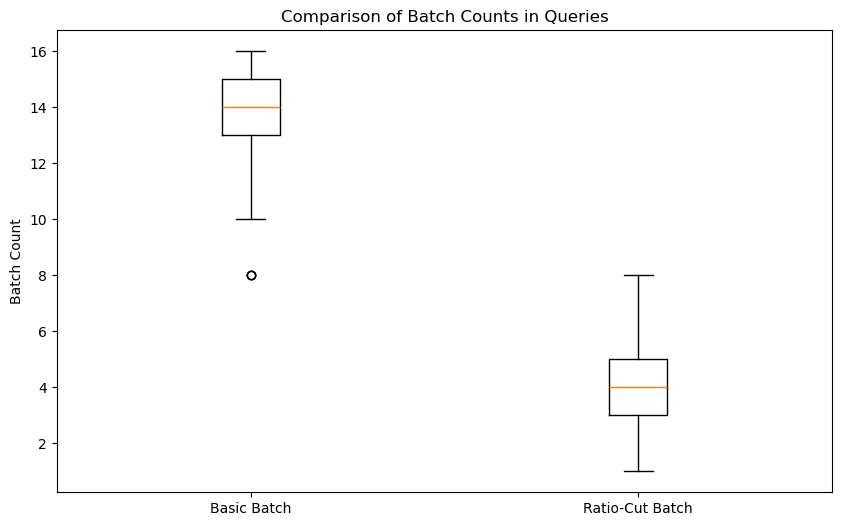

In [449]:
# 计算每个子列表中的元素数量
basic_counts = [len(sublist) for sublist in found_in_basic_batch]
proposed_counts = [len(sublist) for sublist in found_in_proposed_batch]

# 创建一个数字并设置其大小
plt.figure(figsize=(10, 6))

# 绘制箱线图
plt.boxplot([basic_counts, proposed_counts], labels=['Basic Batch', 'Ratio-Cut Batch'])

# 添加标题和标签
plt.title('Comparison of Batch Counts in Queries')
plt.ylabel('Batch Count')

# 显示图表
plt.show()

##### 根据目前每个 Query 中的数据点所在的 Batch_id 到 store_node 中寻找存储了相应的 Batch_id 的 node， 得到 node_id， 再根据 node_id计算出访问失败次数与总计时间

In [450]:
# 现在已经找到了所有要访问的 Batch, 之后到store_node_method_r_d_batched_basic_method 和 store_node_method_r_d_batched_proposed_method 中寻找 存储了相应的 Batch 的 node
# 要访问的每个 batch 在哪个 store node 中, 并计算累计的 1. 访问无服务次数 2. 有服务时的访问时延
# 在Batch中 按照每5个Query为单位 存储了要访问的batch 有哪几个（会出现重复）

# found_in_basic_batch = []      # [[], [], ..., []]
# found_in_proposed_batch = []   # [[], [], ..., []]

# found_in_basic_node
found_in_basic_node_r_d = []
basic_node_tmp = []
for query in found_in_basic_batch:
    # print(query)
    found_batches = list(set(query))
    # print(found_batches)
    for batch_id in found_batches:
        # 首先要合并所有相同的 batch_id , 再对每个不同的Batch_id到store_node中找到 node_id 存入found_in_xxx_node
        flag = False
        for node_id, node_info in store_node_method_r_d_batched_basic_method.items():
            if flag:
                break            
            for key, value in node_info['batches']:
                if int(batch_id) == int(key):
                    basic_node_tmp.append(node_id)
                    flag = True
                    break
    found_in_basic_node_r_d.append(copy.deepcopy(basic_node_tmp))
    basic_node_tmp.clear()


# found_in_proposed_node
found_in_proposed_node_r_d = []
proposed_node_tmp = []
for query in found_in_proposed_batch:
    # print(query)
    found_batches = list(set(query))
    # print(found_batches)
    for batch_id in found_batches:
        # 首先要合并所有相同的 batch_id , 再对每个不同的Batch_id到store_node中找到 node_id 存入found_in_xxx_node
        flag = False
        for node_id, node_info in store_node_method_r_d_batched_proposed_method.items():
            if flag:
                break            
            for key, value in node_info['batches']:
                if int(batch_id) == int(key):
                    proposed_node_tmp.append(node_id)
                    flag = True
                    break
    found_in_proposed_node_r_d.append(copy.deepcopy(proposed_node_tmp))
    proposed_node_tmp.clear()

In [451]:
found_in_basic_node_r_d

[[37, 37, 37, 37, 37, 37, 37, 16, 16, 37, 16, 9, 37, 37],
 [37, 37, 37, 37, 37, 37, 16, 16, 37, 16, 9, 37, 37, 16],
 [37, 37, 37, 37, 37, 37, 16, 16, 37, 37, 16, 9, 37, 37, 16],
 [37, 37, 37, 37, 37, 37, 37, 16, 16, 37, 37, 16, 9, 37, 16],
 [37, 37, 37, 37, 37, 37, 37, 16, 16, 37, 37, 16, 9, 37, 37, 16],
 [37, 37, 37, 37, 37, 37, 37, 16, 37, 37, 9, 37, 37, 16],
 [37, 37, 37, 37, 37, 37, 16, 37, 37, 9, 37, 37, 16],
 [37, 37, 37, 37, 37, 37, 37, 16, 16, 37, 16, 9, 37, 37],
 [37, 37, 16, 9, 16, 16, 16, 16, 16, 37, 37, 16, 37, 16, 16],
 [37, 37, 16, 9, 16, 16, 16, 16, 16, 37, 37, 16, 37, 16, 16, 37],
 [37, 37, 16, 9, 16, 16, 16, 16, 16, 37, 16, 16, 16, 37],
 [37, 37, 16, 9, 16, 16, 16, 16, 16, 37, 37, 16, 37, 16, 37],
 [37, 37, 16, 9, 16, 16, 16, 16, 37, 37, 16, 37, 16, 16, 37],
 [37, 37, 16, 9, 16, 16, 16, 16, 16, 37, 37, 16, 37, 16, 16, 37],
 [37, 37, 16, 9, 16, 16, 16, 16, 37, 37, 16, 37, 16, 37],
 [37, 37, 16, 9, 16, 16, 16, 16, 37, 37, 16, 37, 16, 37],
 [37, 37, 16, 16, 41, 37, 16, 37

In [452]:
found_in_proposed_node_r_d

[[9, 37, 16],
 [37, 37, 41, 37, 16, 9, 16],
 [37, 37, 37, 16],
 [37, 9, 37],
 [16, 37, 16, 37, 9],
 [37, 16, 37, 37],
 [37, 16, 9],
 [9, 37, 16, 37],
 [37, 49, 37, 16],
 [37, 16, 37, 41],
 [37, 37, 41, 37, 16],
 [37, 37, 49, 37, 16],
 [9, 37, 41, 16, 49],
 [37, 37, 37, 37, 37],
 [37, 9, 37, 37, 37, 16],
 [37, 37, 9, 37, 37],
 [9, 37, 16, 37, 16, 16],
 [9, 37, 37, 9],
 [9, 37, 37, 37, 16, 16],
 [37, 37, 9, 37, 16],
 [37, 16, 37],
 [16, 16, 9, 37],
 [37, 16, 37, 9],
 [16, 37, 37],
 [37, 41, 16],
 [41, 37, 49, 16],
 [16, 37, 31, 37],
 [41, 37, 49, 16],
 [37, 37, 16],
 [37, 31, 37],
 [37, 37, 41, 16],
 [37, 37, 16],
 [37, 37, 37, 9],
 [9, 41, 16, 9, 16],
 [37, 9, 16, 16, 37, 41],
 [37, 16, 16],
 [9, 16, 37, 9, 37, 16, 37],
 [37, 37, 9, 41, 16, 16, 37, 41],
 [9, 16, 16],
 [9, 16, 37, 9, 16, 37],
 [16, 37, 41],
 [37, 37, 16],
 [37, 16, 41],
 [16, 37, 37, 37],
 [37, 16, 37, 16, 41],
 [37, 16, 16, 37, 37],
 [37, 16, 41, 37],
 [37, 16, 16, 37, 37],
 [41, 16, 37, 41],
 [37, 37, 41, 41, 41],
 [37

In [453]:
for idx in range(len(found_in_basic_node_r_d)):
    found_in_basic_node_r_d[idx] = list(set(found_in_basic_node_r_d[idx]))
for idx in range(len(found_in_proposed_node_r_d)):
    found_in_proposed_node_r_d[idx] = list(set(found_in_proposed_node_r_d[idx]))

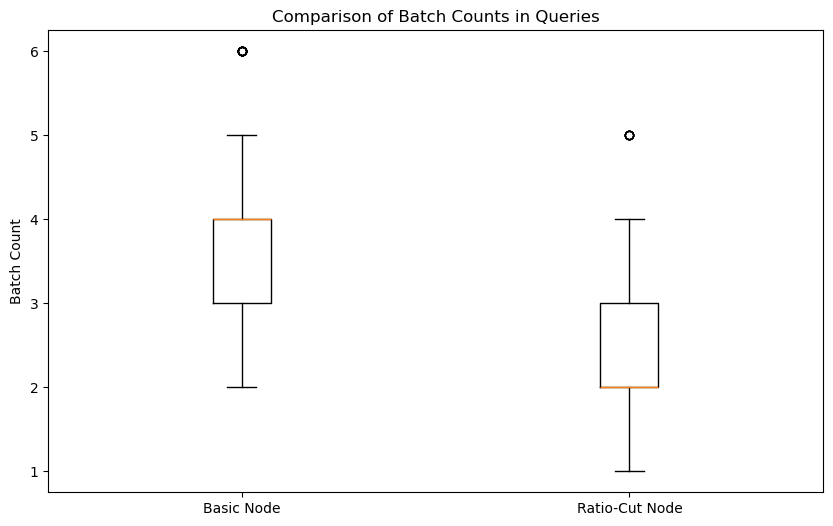

In [454]:
# 计算每个子列表中的元素数量
basic_counts = [len(sublist) for sublist in found_in_basic_node_r_d]
proposed_counts = [len(sublist) for sublist in found_in_proposed_node_r_d]

# 创建一个数字并设置其大小
plt.figure(figsize=(10, 6))

# 绘制箱线图
plt.boxplot([basic_counts, proposed_counts], labels=['Basic Node', 'Ratio-Cut Node'])

# 添加标题和标签
plt.title('Comparison of Batch Counts in Queries')
plt.ylabel('Batch Count')

# 显示图表
plt.show()

In [398]:
time_consumed_max_basic, refuse_cnt_basic, accept_cnt_basic, serve_prob_basic = cal_time(found_in_basic_node_r_d, store_node_method_r_d_batched_basic_method)
time_consumed_max_proposed, refuse_cnt_proposed, accept_cnt_proposed, serve_prob_proposed = cal_time(found_in_proposed_node_r_d, store_node_method_r_d_batched_proposed_method)

In [399]:
time_consumed_max_basic, refuse_cnt_basic, accept_cnt_basic, serve_prob_basic

(10922.30545696432, 1237, 1728, 0.5827993254637437)

In [400]:
time_consumed_max_proposed, refuse_cnt_proposed, accept_cnt_proposed, serve_prob_proposed

(7094.563284692668, 813, 1101, 0.5752351097178683)

# 方法二：有信誉无距离

In [401]:
# 根据Storage Space + Probability 计算出Score rank，随机在Rank 前10中取一个 node 存储
store_node_method_r = copy.deepcopy(store_node)

In [402]:
store_node_method_r_batched_basic_method = copy.deepcopy(store_node_method_r)

for key, batch in batched_basic_method.items():
    # 要选取一个store node存储
    sorted_nodes_r = sorted(store_node_method_r_batched_basic_method.items(), key=lambda x: x[1]['score_sp'], reverse=True) # Ture 指定为降序排序

    # 从得分前 10 的节点中随机选择一个节点
    top_ten_nodes_r = sorted_nodes_r[:10]
    saved_flag = False
    for node in top_ten_nodes_r:
        if saved_flag:
            break
        get_pro = node[1]['probability']
        # 得到命中概率
        if probabilistic_true(get_pro):
            # 若命中，则存入
            store_node_method_r_batched_basic_method[node[0]]['batches'].append((key, batch))
            saved_flag = True
            
    if not saved_flag:
        # 10 个都没命中，则存入 rank 第一的 node 中
        store_node_method_r_batched_basic_method[top_ten_nodes_r[0][0]]['batches'].append((key, batch))

In [403]:
store_node_method_r_batched_basic_method

{1: {'distance': 6006.739018532131,
  'storage space': 998.2531793333991,
  'probability': 0.6124654978333537,
  'score_sp': 612.4654978333537,
  'score_sd': 6006.739018532131,
  'batches': []},
 2: {'distance': 1460.9126979988905,
  'storage space': 863.1554103550512,
  'probability': 0.42953408481141253,
  'score_sp': 429.5340848114125,
  'score_sd': 1460.9126979988905,
  'batches': []},
 3: {'distance': 8197.221702667463,
  'storage space': 962.712107355321,
  'probability': 0.39618685846027657,
  'score_sp': 396.1868584602766,
  'score_sd': 8197.221702667463,
  'batches': []},
 4: {'distance': 3682.421674769622,
  'storage space': 1034.603694612525,
  'probability': 0.4195211556699152,
  'score_sp': 419.52115566991523,
  'score_sd': 3682.421674769622,
  'batches': []},
 5: {'distance': 7762.619273054581,
  'storage space': 1031.642091240382,
  'probability': 0.5765365453585931,
  'score_sp': 576.5365453585931,
  'score_sd': 7762.619273054581,
  'batches': []},
 6: {'distance': 5328

In [404]:
store_node_method_r_batched_proposed_method = copy.deepcopy(store_node_method_r)

for key, batch in batched_proposed_method.items():
    # 要选取一个store node存储
    sorted_nodes_r = sorted(store_node_method_r_batched_proposed_method.items(), key=lambda x: x[1]['score_sp'], reverse=True)
    # 从得分前 10 的节点中随机选择一个节点
    top_ten_nodes_r = sorted_nodes_r[:10]
    saved_flag = False
    for node in top_ten_nodes_r:
        if saved_flag:
            break
        get_pro = node[1]['probability']
        # 得到命中概率
        if probabilistic_true(get_pro):
            # 若命中，则存入
            store_node_method_r_batched_proposed_method[node[0]]['batches'].append((key, batch))
            saved_flag = True
    if not saved_flag:
        # 10 个都没命中，则存入 rank 第一的 node 中
        store_node_method_r_batched_proposed_method[top_ten_nodes_r[0][0]]['batches'].append((key, batch))

In [405]:
# 遍历Query_sets，在两种store node的存储方式上，访问所有的query，计算得到指标
found_in_basic_batch_r = [] # [[], [], ..., []] 记录了每个 query 中每个 point 所在的batch_id ， 用于后续去 store
found_in_proposed_batch_r = []
for query_set in Query_sets:
    basic_batches4q = []
    proposed_batches4q = []
    for query in query_set:
        # 对每一个 q, 得到 time 和 device 
        time_low, time_high, device_low, device_high = query[0][0], query[0][1], query[1][0], query[1][1]
        print(f"time_low:{time_low}, time_high:{time_high}, device_low:{device_low}, device_high:{device_high}")
        # 找到 device 所在的 batch, 计算出每个 q 需要访问哪些 batch
        # 直接遍历搜索空间过大，进行优化: 从time来确定Batch_id范围: 0~19s 内的数据处于 0~3 的 batch 之间
        # 由于 同一批Query_set中的元素都在同一批Batch中，故直接由time_low定出 batch range
        batch_low, batch_high = int(time_low / time_on_chain) * int(time_on_chain * device_value_max / unit_num / batch_num), (int(time_low / time_on_chain) + 1) * int(time_on_chain * device_value_max / unit_num / batch_num) - 1
        # print(f"batch_low:{batch_low} and batch_high:{batch_high}")
        for device in range(device_low, device_high + 1):
            for time in range(time_low, time_high + 1):
                # print(f"time: {time}, device: {device}")
                basic_flag = False
                proposed_flag = False
                # 对每个 （time, device） 找到所属的Batch
                for batch_id in range(batch_low, batch_high + 1):
                    # print(f"batch id is : {batch}")
                    # batch结构: [[], [], ..., []]
                    if not basic_flag:
                        batch = copy.deepcopy(batched_basic_method[str(batch_id)])
                        for unit in batch:
                            for point in unit:
                                # print(f"{point[0]}  and  {point[1]}")
                                if time == point[0] and device == point[1]:
                                    # print(f"----basic find point")
                                    # 找到了所属的Batch，继续寻找所属的store node
                                    basic_batches4q.append(batch_id)
                                    basic_flag = True
                    if not proposed_flag:
                        batch = copy.deepcopy(batched_proposed_method[str(batch_id)])
                        for unit in batch:
                            for point in unit:
                                if time == point[0] and device == point[1]:
                                    # print(f"----proposed find point")
                                    # 找到了所属的Batch，继续寻找所属的store node
                                    proposed_batches4q.append(batch_id)
                                    proposed_flag = True
                    if proposed_flag and basic_flag:
                        break
                # print(f"belong_to_basic_batch:{belong_to_basic_batch} and belong_to_proposed_batch:{belong_to_proposed_batch}")
        found_in_basic_batch_r.append(copy.deepcopy(basic_batches4q))
        found_in_proposed_batch_r.append(copy.deepcopy(proposed_batches4q))
        basic_batches4q.clear()
        proposed_batches4q.clear()

time_low:4, time_high:14, device_low:11, device_high:13
time_low:4, time_high:10, device_low:14, device_high:18
time_low:1, time_high:13, device_low:4, device_high:6
time_low:8, time_high:18, device_low:7, device_high:9
time_low:7, time_high:19, device_low:1, device_high:3
time_low:9, time_high:19, device_low:3, device_high:5
time_low:10, time_high:19, device_low:5, device_high:7
time_low:6, time_high:16, device_low:11, device_high:13
time_low:20, time_high:32, device_low:10, device_high:12
time_low:27, time_high:39, device_low:5, device_high:7
time_low:24, time_high:36, device_low:5, device_high:7
time_low:27, time_high:39, device_low:10, device_high:12
time_low:23, time_high:35, device_low:13, device_high:15
time_low:20, time_high:30, device_low:16, device_high:18
time_low:31, time_high:37, device_low:8, device_high:12
time_low:29, time_high:39, device_low:15, device_high:17
time_low:41, time_high:47, device_low:7, device_high:11
time_low:44, time_high:56, device_low:12, device_high:

In [406]:
found_in_basic_batch_r

[[1,
  12,
  1,
  9,
  6,
  11,
  11,
  13,
  7,
  12,
  12,
  9,
  4,
  0,
  0,
  4,
  4,
  2,
  3,
  7,
  0,
  5,
  5,
  13,
  7,
  8,
  13,
  12,
  2,
  11,
  14,
  1,
  4],
 [10,
  6,
  11,
  15,
  13,
  12,
  1,
  4,
  13,
  8,
  12,
  12,
  7,
  2,
  5,
  8,
  11,
  8,
  12,
  15,
  0,
  11,
  5,
  12,
  5,
  14,
  15,
  11,
  15,
  4,
  2,
  10,
  8,
  4,
  15],
 [1,
  0,
  5,
  6,
  11,
  3,
  2,
  13,
  15,
  9,
  15,
  6,
  14,
  5,
  9,
  6,
  15,
  3,
  11,
  7,
  3,
  2,
  0,
  12,
  0,
  0,
  3,
  1,
  8,
  13,
  1,
  6,
  11,
  13,
  1,
  7,
  14,
  10,
  5],
 [6,
  5,
  5,
  7,
  2,
  12,
  3,
  14,
  1,
  9,
  14,
  9,
  4,
  0,
  6,
  8,
  10,
  4,
  0,
  11,
  10,
  9,
  15,
  7,
  6,
  5,
  10,
  2,
  4,
  6,
  10,
  10,
  12],
 [11,
  14,
  3,
  6,
  8,
  13,
  7,
  13,
  9,
  7,
  10,
  2,
  12,
  2,
  9,
  9,
  4,
  6,
  0,
  13,
  12,
  11,
  15,
  2,
  7,
  8,
  7,
  3,
  13,
  3,
  4,
  3,
  2,
  1,
  5,
  1,
  13,
  5,
  15],
 [13,
  3,
  4,
  3,
  2,
  1,
  

In [407]:
found_in_proposed_batch_r

[[14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  12,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11],
 [4,
  4,
  4,
  4,
  4,
  4,
  4,
  13,
  13,
  13,
  13,
  13,
  13,
  14,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  5,
  5,
  5,
  5,
  5,
  5,
  6],
 [3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  8,
  8,
  8,
  8,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9],
 [13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  8,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15],
 [10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  11,
  11,
  11,
  11,
  11,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  9,
  9,
  9,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10],
 [9,
  10,
  10

In [408]:
found_in_basic_node_r = []
basic_node_tmp = []
for query in found_in_basic_batch_r:
    # print(query)
    found_batches = list(set(query))
    # print(found_batches)
    for batch_id in found_batches:
        # 首先要合并所有相同的 batch_id , 再对每个不同的Batch_id到store_node中找到 node_id 存入found_in_xxx_node
        flag = False
        for node_id, node_info in store_node_method_r_batched_basic_method.items():
            if flag:
                break            
            for key, value in node_info['batches']:
                if int(batch_id) == int(key):
                    basic_node_tmp.append(node_id)
                    flag = True
                    break
    found_in_basic_node_r.append(copy.deepcopy(basic_node_tmp))
    basic_node_tmp.clear()


# found_in_proposed_node
found_in_proposed_node_r = []
proposed_node_tmp = []
for query in found_in_proposed_batch:
    # print(query)
    found_batches = list(set(query))
    # print(found_batches)
    for batch_id in found_batches:
        # 首先要合并所有相同的 batch_id , 再对每个不同的Batch_id到store_node中找到 node_id 存入found_in_xxx_node
        flag = False
        for node_id, node_info in store_node_method_r_batched_proposed_method.items():
            if flag:
                break            
            for key, value in node_info['batches']:
                if int(batch_id) == int(key):
                    proposed_node_tmp.append(node_id)
                    flag = True
                    break
    found_in_proposed_node_r.append(copy.deepcopy(proposed_node_tmp))
    proposed_node_tmp.clear()

In [409]:
found_in_basic_node_r

[[41, 49, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41],
 [41, 49, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41],
 [41, 49, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41],
 [41, 49, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41],
 [41, 49, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41],
 [41, 49, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41],
 [41, 49, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41],
 [41, 49, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41],
 [41, 41, 49, 49, 41, 49, 41, 41, 41, 41, 15, 41, 49, 41, 41],
 [41, 41, 49, 49, 41, 49, 41, 41, 41, 41, 15, 41, 49, 41, 41, 41],
 [41, 41, 49, 49, 41, 49, 41, 41, 41, 15, 41, 41, 41, 41],
 [41, 41, 49, 49, 41, 49, 41, 41, 41, 41, 15, 41, 49, 41, 41],
 [41, 41, 49, 49, 41, 41, 41, 41, 41, 15, 41, 49, 41, 41, 41],
 [41, 41, 49, 49, 41, 49, 41, 41, 41, 41, 15, 41, 49, 41, 41, 41],
 [41, 41, 49, 49, 41, 49, 41, 41, 41, 15, 41, 49, 41, 41],
 [41, 41, 49, 49, 41, 49, 41, 41, 41, 15, 41, 49, 41, 41],
 [41, 41, 41, 41

In [410]:
found_in_proposed_node_r

[[41, 41, 41],
 [41, 41, 49, 41, 41, 41, 41],
 [41, 41, 41, 15],
 [41, 41, 41],
 [41, 41, 15, 41, 41],
 [41, 15, 41, 41],
 [41, 15, 41],
 [41, 41, 41, 41],
 [41, 41, 41, 41],
 [41, 41, 41, 41],
 [41, 41, 41, 41, 41],
 [41, 41, 41, 41, 41],
 [49, 41, 41, 41, 41],
 [41, 41, 41, 41, 41],
 [41, 49, 41, 41, 41, 41],
 [41, 41, 49, 41, 41],
 [41, 41, 41, 41, 41, 41],
 [41, 41, 41, 41],
 [41, 41, 41, 41, 41, 41],
 [49, 41, 41, 41, 41],
 [41, 41, 41],
 [41, 49, 41, 41],
 [41, 41, 41, 41],
 [41, 41, 41],
 [41, 41, 29],
 [41, 41, 41, 29],
 [41, 49, 41, 41],
 [41, 41, 41, 29],
 [49, 41, 29],
 [49, 41, 41],
 [49, 41, 41, 29],
 [41, 41, 49],
 [49, 49, 41, 41],
 [41, 41, 49, 41, 41],
 [49, 41, 41, 49, 41, 41],
 [41, 41, 41],
 [49, 41, 41, 41, 41, 41, 41],
 [49, 49, 41, 41, 41, 49, 41, 41],
 [41, 41, 49],
 [49, 41, 41, 41, 41, 41],
 [41, 41, 41],
 [41, 41, 41],
 [41, 41, 41],
 [41, 41, 41, 41],
 [41, 41, 41, 41, 41],
 [41, 41, 41, 41, 41],
 [41, 41, 41, 41],
 [41, 41, 41, 41, 41],
 [41, 41, 49, 41],
 

In [411]:
time_consumed_max_basic, refuse_cnt_basic, accept_cnt_basic, serve_prob_basic = cal_time(found_in_basic_node_r, store_node_method_r_batched_basic_method)
time_consumed_max_proposed, refuse_cnt_proposed, accept_cnt_proposed, serve_prob_proposed = cal_time(found_in_proposed_node_r, store_node_method_r_batched_proposed_method)

In [412]:
time_consumed_max_basic, refuse_cnt_basic, accept_cnt_basic, serve_prob_basic

(28908.175576922324, 512, 1575, 0.7546717776712986)

In [413]:
time_consumed_max_proposed, refuse_cnt_proposed, accept_cnt_proposed, serve_prob_proposed

(17792.592286103714, 329, 1028, 0.7575534266764923)

# 方法三：无信誉有距离

In [414]:
# 根据Storage Space + Distance 计算出Score rank，随机在Rank 前10中取一个 node 存储
store_node_method_d = copy.deepcopy(store_node)

In [415]:
# batched_basic_method 
store_node_method_d_batched_basic_method = copy.deepcopy(store_node_method_d)

for key, batch in batched_basic_method.items():
    # 要选取一个store node存储
    sorted_nodes_d = sorted(store_node_method_d_batched_basic_method.items(), key=lambda x: x[1]['score_sd'], reverse=False) # 升序排序，距离越小越优先
    # 从得分前 10 的节点中随机选择一个节点
    top_ten_nodes = sorted_nodes_d[:10]
    random_choice_node= random.choice(top_ten_nodes)
    store_node_method_d_batched_basic_method[random_choice_node[0]]['batches'].append((key, batch))

In [416]:
# batched_proposed_method
# batched_proposed_method
# batched_proposed_method
store_node_method_d_batched_proposed_method = copy.deepcopy(store_node_method_d)

for key, batch in batched_proposed_method.items():
    # 要选取一个store node存储
    sorted_nodes_d = sorted(store_node_method_d_batched_proposed_method.items(), key=lambda x: x[1]['score_sd'], reverse=False) # 升序排序，距离越小越优先
    # 从得分前 10 的节点中随机选择一个节点
    top_ten_nodes = sorted_nodes_d[:10]
    random_choice_node = random.choice(top_ten_nodes)
    store_node_method_d_batched_proposed_method[random_choice_node[0]]['batches'].append((key, batch))

In [417]:
# 遍历Query_sets，在两种store node的存储方式上，访问所有的query，计算得到指标
found_in_basic_batch = [] # [[], [], ..., []] 记录了每个 query 中每个 point 所在的batch_id ， 用于后续去 store
found_in_proposed_batch = []
found_in_basic_batch.clear()
found_in_proposed_batch.clear()
for query_set in Query_sets:
    basic_batches4q = []
    proposed_batches4q = []
    for query in query_set:
        # 对每一个 q, 得到 time 和 device 
        time_low, time_high, device_low, device_high = query[0][0], query[0][1], query[1][0], query[1][1]
        print(f"time_low:{time_low}, time_high:{time_high}, device_low:{device_low}, device_high:{device_high}")
        # 找到 device 所在的 batch, 计算出每个 q 需要访问哪些 batch
        # 直接遍历搜索空间过大，进行优化: 从time来确定Batch_id范围: 0~19s 内的数据处于 0~3 的 batch 之间
        # 由于 同一批Query_set中的元素都在同一批Batch中，故直接由time_low定出 batch range
        batch_low, batch_high = int(time_low / time_on_chain) * int(time_on_chain * device_value_max / unit_num / batch_num), (int(time_low / time_on_chain) + 1) * int(time_on_chain * device_value_max / unit_num / batch_num) - 1
        # print(f"batch_low:{batch_low} and batch_high:{batch_high}")
        for device in range(device_low, device_high + 1):
            for time in range(time_low, time_high + 1):
                # print(f"time: {time}, device: {device}")
                basic_flag = False
                proposed_flag = False
                # 对每个 （time, device） 找到所属的Batch
                for batch_id in range(batch_low, batch_high + 1):
                    # print(f"batch id is : {batch}")
                    # batch结构: [[], [], ..., []]
                    
                    if not basic_flag:
                        batch = copy.deepcopy(batched_basic_method[str(batch_id)])
                        for unit in batch:
                            for point in unit:
                                # print(f"{point[0]}  and  {point[1]}")
                                if time == point[0] and device == point[1]:
                                    # print(f"----basic find point")
                                    # 找到了所属的Batch，继续寻找所属的store node
                                    basic_batches4q.append(batch_id)
                                    basic_flag = True
                                
                    if not proposed_flag:
                        batch = copy.deepcopy(batched_proposed_method[str(batch_id)])
                        for unit in batch:
                            for point in unit:
                                if time == point[0] and device == point[1]:
                                    # print(f"----proposed find point")
                                    # 找到了所属的Batch，继续寻找所属的store node
                                    proposed_batches4q.append(batch_id)
                                    proposed_flag = True
                    if proposed_flag and basic_flag:
                        break
                # print(f"belong_to_basic_batch:{belong_to_basic_batch} and belong_to_proposed_batch:{belong_to_proposed_batch}")
        found_in_basic_batch.append(copy.deepcopy(basic_batches4q))
        found_in_proposed_batch.append(copy.deepcopy(proposed_batches4q))
        basic_batches4q.clear()
        proposed_batches4q.clear()

time_low:4, time_high:14, device_low:11, device_high:13
time_low:4, time_high:10, device_low:14, device_high:18
time_low:1, time_high:13, device_low:4, device_high:6
time_low:8, time_high:18, device_low:7, device_high:9
time_low:7, time_high:19, device_low:1, device_high:3
time_low:9, time_high:19, device_low:3, device_high:5
time_low:10, time_high:19, device_low:5, device_high:7
time_low:6, time_high:16, device_low:11, device_high:13
time_low:20, time_high:32, device_low:10, device_high:12
time_low:27, time_high:39, device_low:5, device_high:7
time_low:24, time_high:36, device_low:5, device_high:7
time_low:27, time_high:39, device_low:10, device_high:12
time_low:23, time_high:35, device_low:13, device_high:15
time_low:20, time_high:30, device_low:16, device_high:18
time_low:31, time_high:37, device_low:8, device_high:12
time_low:29, time_high:39, device_low:15, device_high:17
time_low:41, time_high:47, device_low:7, device_high:11
time_low:44, time_high:56, device_low:12, device_high:

In [418]:
found_in_basic_node_d = []
basic_node_tmp = []
for query in found_in_basic_batch:
    # print(query)
    found_batches = list(set(query))
    # print(found_batches)
    for batch_id in found_batches:
        # 首先要合并所有相同的 batch_id , 再对每个不同的Batch_id到store_node中找到 node_id 存入found_in_xxx_node
        flag = False
        for node_id, node_info in store_node_method_d_batched_basic_method.items():
            if flag:
                break            
            for key, value in node_info['batches']:
                if int(batch_id) == int(key):
                    basic_node_tmp.append(node_id)
                    flag = True
                    break
    found_in_basic_node_d.append(copy.deepcopy(basic_node_tmp))
    basic_node_tmp.clear()


# found_in_proposed_node
found_in_proposed_node_d = []
proposed_node_tmp = []
for query in found_in_proposed_batch:
    # print(query)
    found_batches = list(set(query))
    # print(found_batches)
    for batch_id in found_batches:
        # 首先要合并所有相同的 batch_id , 再对每个不同的Batch_id到store_node中找到 node_id 存入found_in_xxx_node
        flag = False
        for node_id, node_info in store_node_method_d_batched_proposed_method.items():
            if flag:
                break            
            for key, value in node_info['batches']:
                if int(batch_id) == int(key):
                    proposed_node_tmp.append(node_id)
                    flag = True
                    break
    found_in_proposed_node_d.append(copy.deepcopy(proposed_node_tmp))
    proposed_node_tmp.clear()

In [419]:
time_consumed_max_basic, refuse_cnt_basic, accept_cnt_basic, serve_prob_basic = cal_time(found_in_basic_node_d, store_node_method_d_batched_basic_method)
time_consumed_max_proposed, refuse_cnt_proposed, accept_cnt_proposed, serve_prob_proposed = cal_time(found_in_proposed_node_d, store_node_method_d_batched_proposed_method)

In [420]:
time_consumed_max_basic, refuse_cnt_basic, accept_cnt_basic, serve_prob_basic

(19540.45067604638, 2498, 3520, 0.5849119308740446)

In [421]:
time_consumed_max_proposed, refuse_cnt_proposed, accept_cnt_proposed, serve_prob_proposed

(15758.020603532099, 1193, 1595, 0.5720946915351507)

In [422]:
time_consumed_max_basic_r_d, refuse_cnt_basic_r_d, accept_cnt_basic_r_d, serve_prob_basic_r_d = cal_time(found_in_basic_node_r_d, store_node_method_r_batched_basic_method)
time_consumed_max_proposed_r_d, refuse_cnt_proposed_r_d, accept_cnt_proposed_r_d, serve_prob_proposed_r_d = cal_time(found_in_proposed_node_r_d, store_node_method_r_batched_proposed_method)

time_consumed_max_basic_r, refuse_cnt_basic_r, accept_cnt_basic_r, serve_prob_basic_r = cal_time(found_in_basic_node_r, store_node_method_r_batched_basic_method)
time_consumed_max_proposed_r, refuse_cnt_proposed_r, accept_cnt_proposed_r, serve_prob_proposed_r = cal_time(found_in_proposed_node_r, store_node_method_r_batched_proposed_method)

time_consumed_max_basic_d, refuse_cnt_basic_d, accept_cnt_basic_d, serve_prob_basic_d = cal_time(found_in_basic_node_d, store_node_method_d_batched_basic_method)
time_consumed_max_proposed_d, refuse_cnt_proposed_d, accept_cnt_proposed_d, serve_prob_proposed_d = cal_time(found_in_proposed_node_d, store_node_method_d_batched_proposed_method)

In [423]:
import matplotlib.pyplot as plt
import numpy as np

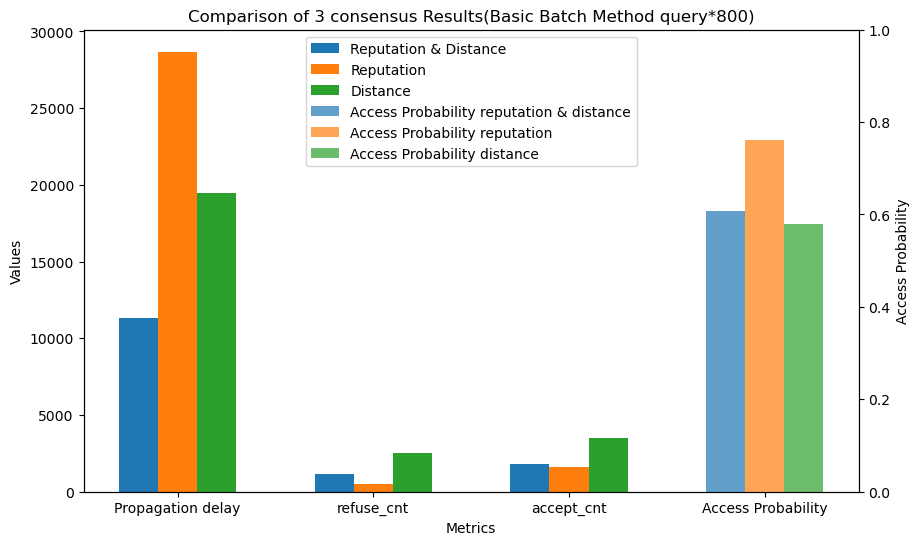

In [460]:
# Sample data based on the user's descriptions
# Data is assumed for demonstration as actual data isn't provided
data_basic_r_d = [time_consumed_max_basic_r_d, refuse_cnt_basic_r_d, accept_cnt_basic_r_d, serve_prob_basic_r_d]  # time_consumed_max_basic_r_d, refuse_cnt_basic_r_d, accept_cnt_basic_r_d, serve_prob_basic_r_d
data_proposed_r_d = [time_consumed_max_proposed_r_d, refuse_cnt_proposed_r_d, accept_cnt_proposed_r_d, serve_prob_proposed_r_d]  # time_consumed_max_proposed_r_d, refuse_cnt_proposed_r_d, accept_cnt_proposed_r_d, serve_prob_proposed_r_d

data_basic_r = [time_consumed_max_basic_r, refuse_cnt_basic_r, accept_cnt_basic_r, serve_prob_basic_r]  # time_consumed_max_basic_r, refuse_cnt_basic_r, accept_cnt_basic_r, serve_prob_basic_r
data_proposed_r = [time_consumed_max_proposed_r, refuse_cnt_proposed_r, accept_cnt_proposed_r, serve_prob_proposed_r]  # time_consumed_max_proposed_r, refuse_cnt_proposed_r, accept_cnt_proposed_r, serve_prob_proposed_r

data_basic_d = [time_consumed_max_basic_d, refuse_cnt_basic_d, accept_cnt_basic_d, serve_prob_basic_d]  # time_consumed_max_basic, refuse_cnt_basic, accept_cnt_basic, serve_prob_basic
data_proposed_d = [time_consumed_max_proposed_d, refuse_cnt_proposed_d, accept_cnt_proposed_d, serve_prob_proposed_d]  # time_consumed_max_proposed, refuse_cnt_proposed, accept_cnt_proposed, serve_prob_proposed

categories = ['Propagation delay', 'refuse_cnt', 'accept_cnt', 'Access Probability']

# Plot 1: Horizontal comparison for basic method
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(categories))

# Plot bars for time_consumed_max, refuse_cnt, accept_cnt, and serve_prob with primary y-axis for the first three metrics
ax1.bar(index, data_basic_r_d, bar_width, label='Reputation & Distance')
ax1.bar(index + bar_width, data_basic_r, bar_width, label='Reputation')
ax1.bar(index + 2 * bar_width, data_basic_d, bar_width, label='Distance')

# Set labels, title, and legend for primary axis
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values')
ax1.set_title('Comparison of 3 consensus Results(Basic Batch Method query*800)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

# Create secondary axis for serve_prob with adjusted range
ax2 = ax1.twinx()
ax2.set_ylabel('Access Probability')

# Adjust the range of serve_prob to be more prominent
serve_prob_scaled_r_d = np.array(data_basic_r_d[-1]) # Scaling factor
serve_prob_scaled_r = np.array(data_basic_r[-1])
serve_prob_scaled_d = np.array(data_basic_d[-1])

# Plot scaled serve_prob values as bars on secondary axis
ax2.bar(index[-1], serve_prob_scaled_r_d, bar_width, label='Access Probability reputation & distance', alpha=0.7)
ax2.bar(index[-1] + bar_width, serve_prob_scaled_r, bar_width, label='Access Probability reputation', alpha=0.7)
ax2.bar(index[-1] + 2 * bar_width, serve_prob_scaled_d, bar_width, label='Access Probability distance', alpha=0.7)

ax2.set_ylim(0, 1)  # Adjust the range of secondary axis for serve_prob

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')

plt.show()

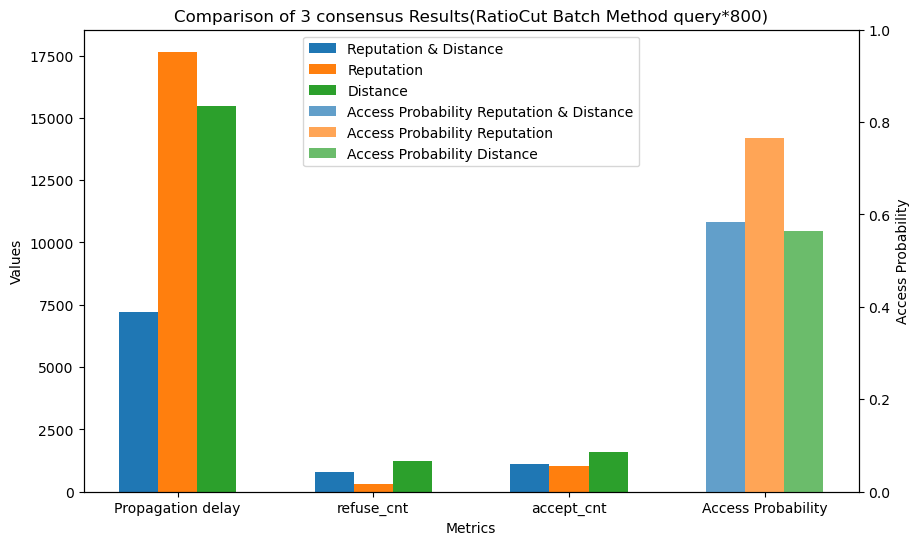

In [461]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(categories))

# Plot bars for time_consumed_max, refuse_cnt, accept_cnt, and serve_prob with primary y-axis for the first three metrics
ax1.bar(index, data_proposed_r_d, bar_width, label='Reputation & Distance')
ax1.bar(index + bar_width, data_proposed_r, bar_width, label='Reputation')
ax1.bar(index + 2 * bar_width, data_proposed_d, bar_width, label='Distance')

# Set labels, title, and legend for primary axis
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values')
ax1.set_title('Comparison of 3 consensus Results(RatioCut Batch Method query*800)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

# Create secondary axis for serve_prob with adjusted range
ax2 = ax1.twinx()
ax2.set_ylabel('Access Probability')

# Adjust the range of serve_prob to be more prominent
serve_prob_scaled_r_d = np.array(data_proposed_r_d[-1]) # Scaling factor
serve_prob_scaled_r = np.array(data_proposed_r[-1])
serve_prob_scaled_d = np.array(data_proposed_d[-1])

# Plot scaled serve_prob values as bars on secondary axis
ax2.bar(index[-1], serve_prob_scaled_r_d, bar_width, label='Access Probability Reputation & Distance', alpha=0.7)
ax2.bar(index[-1] + bar_width, serve_prob_scaled_r, bar_width, label='Access Probability Reputation', alpha=0.7)
ax2.bar(index[-1] + 2 * bar_width, serve_prob_scaled_d, bar_width, label='Access Probability Distance', alpha=0.7)

ax2.set_ylim(0, 1)  # Adjust the range of secondary axis for serve_prob

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')

plt.show()
# 修改颜色信息，并将prob调整到0.5-1之间，即增大全重

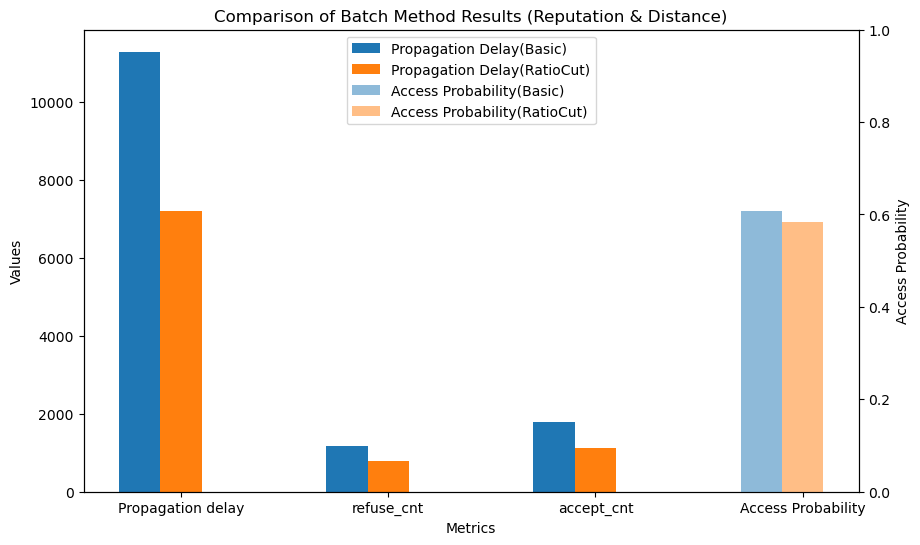

In [465]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(categories))

# Plot bars for time_consumed_max, refuse_cnt, accept_cnt, and serve_prob with primary y-axis for the first three metrics
ax1.bar(index, data_basic_r_d, bar_width, label='Propagation Delay(Basic)')
ax1.bar(index + bar_width, data_proposed_r_d, bar_width, label='Propagation Delay(RatioCut)')

# Set labels, title, and legend for primary axis
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values')
ax1.set_title('Comparison of Batch Method Results (Reputation & Distance)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

# Create secondary axis for serve_prob with adjusted range
ax2 = ax1.twinx()
ax2.set_ylabel('Access Probability')

# Adjust the range of serve_prob to be more prominent
serve_prob_scaled_r_d_basic = np.array(data_basic_r_d[-1]) # Scaling factor
serve_prob_scaled_r_d_proposed = np.array(data_proposed_r_d[-1])

# Plot scaled serve_prob values as bars on secondary axis
ax2.bar(index[-1], serve_prob_scaled_r_d_basic, bar_width, label='Access Probability(Basic)', alpha=0.5)
ax2.bar(index[-1] + bar_width, serve_prob_scaled_r_d_proposed, bar_width, label='Access Probability(RatioCut)', alpha=0.5)

ax2.set_ylim(0, 1)  # Adjust the range of secondary axis for serve_prob

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')

plt.show()

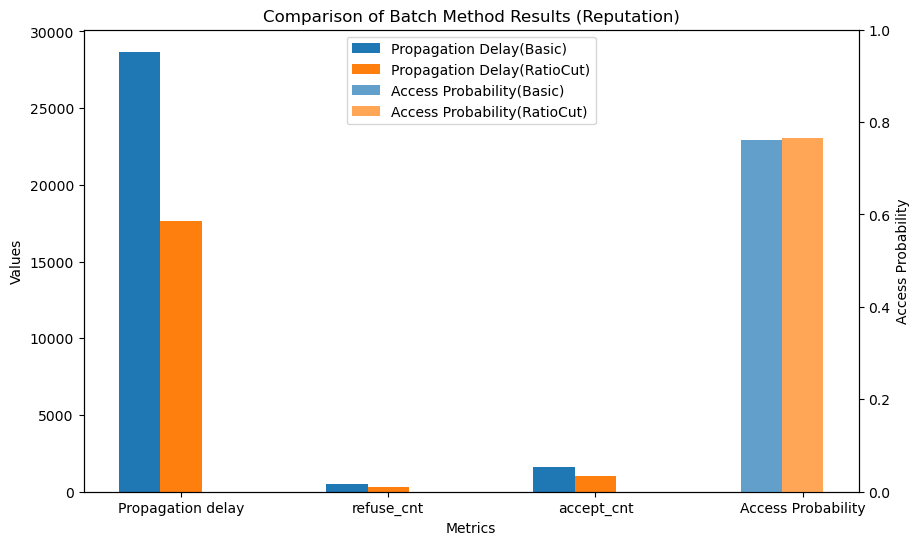

In [467]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(categories))

# Plot bars for time_consumed_max, refuse_cnt, accept_cnt, and serve_prob with primary y-axis for the first three metrics
ax1.bar(index, data_basic_r, bar_width, label='Propagation Delay(Basic)')
ax1.bar(index + bar_width, data_proposed_r, bar_width, label='Propagation Delay(RatioCut)')

# Set labels, title, and legend for primary axis
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values')
ax1.set_title('Comparison of Batch Method Results (Reputation)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

# Create secondary axis for serve_prob with adjusted range
ax2 = ax1.twinx()
ax2.set_ylabel('Access Probability')

# Adjust the range of serve_prob to be more prominent
serve_prob_scaled_r_basic = np.array(data_basic_r[-1]) # Scaling factor
serve_prob_scaled_r_proposed = np.array(data_proposed_r[-1])

# Plot scaled serve_prob values as bars on secondary axis
ax2.bar(index[-1], serve_prob_scaled_r_basic, bar_width, label='Access Probability(Basic)', alpha=0.7)
ax2.bar(index[-1] + bar_width, serve_prob_scaled_r_proposed, bar_width, label='Access Probability(RatioCut)', alpha=0.7)

ax2.set_ylim(0, 1)  # Adjust the range of secondary axis for serve_prob

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')

plt.show()

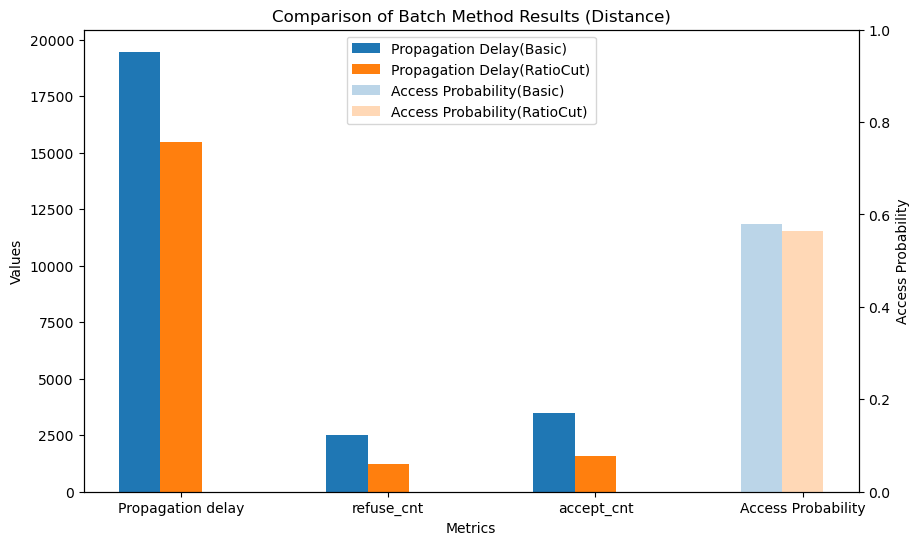

In [468]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(categories))

# Plot bars for time_consumed_max, refuse_cnt, accept_cnt, and serve_prob with primary y-axis for the first three metrics
ax1.bar(index, data_basic_d, bar_width, label='Propagation Delay(Basic)')
ax1.bar(index + bar_width, data_proposed_d, bar_width, label='Propagation Delay(RatioCut)')

# Set labels, title, and legend for primary axis
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Values')
ax1.set_title('Comparison of Batch Method Results (Distance)')
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

# Create secondary axis for serve_prob with adjusted range
ax2 = ax1.twinx()
ax2.set_ylabel('Access Probability')

# Adjust the range of serve_prob to be more prominent
serve_prob_scaled_d_basic = np.array(data_basic_d[-1]) # Scaling factor
serve_prob_scaled_d_proposed = np.array(data_proposed_d[-1])

# Plot scaled serve_prob values as bars on secondary axis
ax2.bar(index[-1], serve_prob_scaled_d_basic, bar_width, label='Access Probability(Basic)', alpha=0.3)
ax2.bar(index[-1] + bar_width, serve_prob_scaled_d_proposed, bar_width, label='Access Probability(RatioCut)', alpha=0.3)

ax2.set_ylim(0, 1)  # Adjust the range of secondary axis for serve_prob

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper center')

plt.show()